In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [11]:
class Node:
    value = None
    left, right = None, None

    def __init__(self, value, left, right):
        self.value = value
        self.left = left
        self.right = right
    
    def __str__(self):
        string = f"{self.value}"
        if self.left is not None and self.right is not None:
            string += f" -> ({self.left.__str__()}, {self.right.__str__()})"
        return string

In [12]:
def _build_tree(probability, height):
    left, right = None, None
    if height > 0:
        left = _build_tree(probability, height - 1)
        right = _build_tree(probability, height - 1)
    
    value = np.random.binomial(n=1, p=probability)

    return Node(value, left, right)

In [13]:
def build_tree(probability, height):
    tree = _build_tree(probability, height)
    tree.value = 1
    return tree

In [14]:
def can_aaron_win(tree, isEvenDepth):
    if tree is None:
        return True
    
    if tree.value == 0:
        return False
    
    canWinLeft = can_aaron_win(tree.left, not isEvenDepth)
    canWinRight = can_aaron_win(tree.right, not isEvenDepth)

    if isEvenDepth:
        return canWinLeft or canWinRight
    else:
        return canWinLeft and canWinRight

In [15]:
def improved_can_aaron_win(currentDepth, maxDepth, probability):
    if currentDepth > maxDepth:
        return True
    
    if currentDepth == 0:
        return improved_can_aaron_win(currentDepth + 1, maxDepth, probability) or improved_can_aaron_win(currentDepth + 1, maxDepth, probability)
    
    flip = np.random.binomial(n=1, p=probability)
    if flip == 0:
        return False
    
    child_left = improved_can_aaron_win(currentDepth + 1, maxDepth, probability)
    child_right = improved_can_aaron_win(currentDepth + 1, maxDepth, probability)

    if currentDepth % 2 == 0:
        return child_left or child_right
    else:
        return child_left and child_right

In [16]:
def build_and_evaluate_instance(probability, height):
    tree = build_tree(probability, height)
    return can_aaron_win(tree, isEvenDepth=True)

In [17]:
def sample(probability, height, samples):
    samples = [improved_can_aaron_win(0, height, probability) for _ in range(samples)]
    probability_aaron_wins = np.average(samples)
    return probability_aaron_wins

In [18]:
samples = 100
height = 20
start = 0.5
end = 0.98
marks = 50
probabilities = [(1 - i/marks) * start + (i/marks) * end for i in range(0, marks)]
expected_time = samples * (2 ** height) * len(probabilities) / 3209920
print(f"Expected time it will take to complete {expected_time:.2f}s")
sample_aaron_successes = [sample(probability, height, samples) for probability in tqdm(probabilities)]

Expected time it will take to complete 1633.34s


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [04:46<00:00,  5.73s/it] 


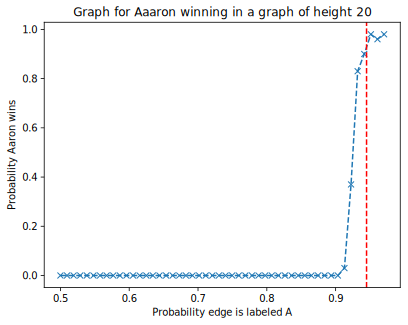

In [27]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

plt.plot(probabilities, sample_aaron_successes, marker="x", linestyle='--')
critical_point = (27 / 32) ** (1 / 3)
plt.axvline(x=critical_point, color='red', linestyle='--')

plt.title("Graph for Aaaron winning in a graph of height 20")
plt.ylabel("Probability Aaron wins")
plt.xlabel("Probability edge is labeled A")

plt.savefig('plot.svg')  

plt.show()
